<a href="https://colab.research.google.com/github/MohammadAli-Balaj/Literature_Generation-With-Markov-Chains/blob/main/Markov_Chain_Lyrics_Poetry_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Lyrics/Poetry Generation With Markov Chains**




---




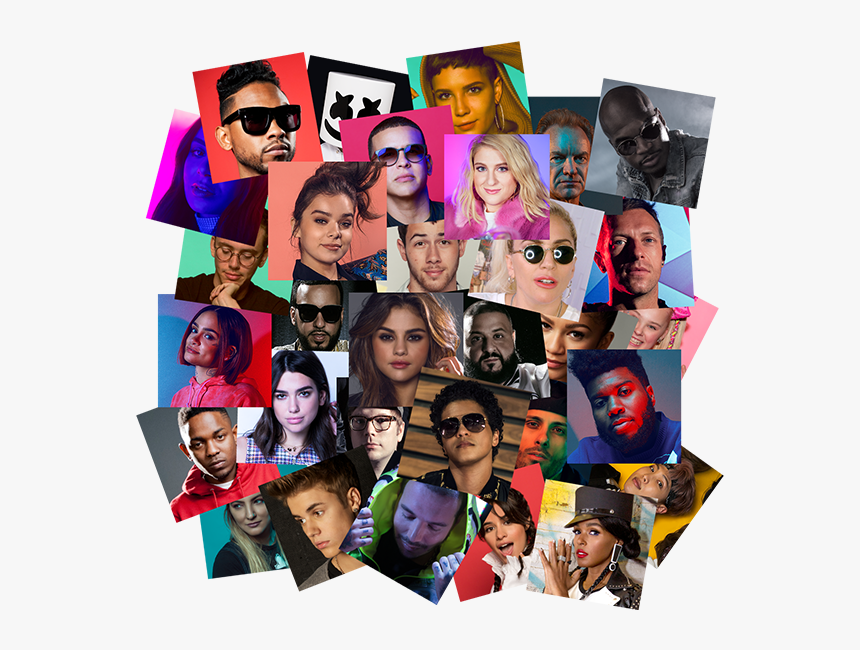



---


## Advanced Topics - Applied Data Science
## Supervisor: Em. O. Univ.-Prof. Dr. Jürgen Pilz
### Author: Mohammad-Ali Balaj




---





## Installing Pronouncing Python library:
#### Pronouncing is a simple interface for the CMU Pronouncing Dictionary and has no external dependencies. 

In [ ]:
!pip install pronouncing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Installing markovify Python library:
#### Markovify is a simple, extensible Markov chain generator.

In [ ]:
!pip install markovify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing of needed Python libraries:

In [ ]:
import pronouncing
import markovify
import re
import random
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers.core import Dense
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Mounting at data (the dataset is already uploaded in google drive):

### The Song Lyrics dataset is published by Paul Mooney in Kaggle. It is an open-source data (license: CC0: Public Domain) and contains 49 lyrics in text format!

In [ ]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


##Notorious B.I.G. Poems data:

In [ ]:
path="/content/data/MyDrive/lyrics/notorious-big.txt"

## The first 1000 characters from the collection of poems by Notorious B.I.G.:

In [ ]:
with open(path) as f:
    print (f.read(1000))

﻿baby It was all a dream
I used to read Word Up magazine
Salt n Pepa and Heavy D up in the limousine
Hangin pictures on my wall
Every Saturday Rap Attack Mr Magic Marley Marl
I let my tape rock til my tape popped
Smokin weed and Bambu sippin on Private Stock
Way back when I had the red and black lumberjack
With the hat to match
Remember Rappin Duke duhha duhha
You never thought that hip hop would take it this far
Now Im in the limelight cause I rhyme tight
Time to get paid blow up like the World Trade
Born sinner the opposite of a winner
Remember when I used to eat sardines for dinner
Peace to Ron G Brucey B Kid Capri
Funkmaster Flex Lovebug Starski wassup
Im blowin up like you thought I would
Call the crib same number same hood thats right
Its all good its aaalll good
And if you dont know now you know niXga You know very well who you are
Dont let em hold you down reach for the stars
You had a few but not that many
Cause youre the only one Ill give you good and plenty I made the change

## Lil Wayne Poems data:

In [ ]:
pth="/content/data/MyDrive/lyrics/Lil_Wayne.txt"

## The first 1000 characters from the collection of poems by Lil Wayne:

In [ ]:
with open(pth) as f: 
    print (f.read(1000))

﻿They call me Mr Carter I kissed the daughter
Of the deads forehead I killed the father
Spilled the heart of a mildew hater
I will put them body on chill like glaciers
Gracias Im crazy yes its obvious
Going against me is atheist
I got my angels on my shoulders and a quarter of that angel dust
I aint sniffin Im just pitchin ya honor I aint snitchin ya honor
Hate bitch niXgas bitches with power
Vacate when the kitchen get hotter
I just sit on the counter open the cabinet close the cupboard
Put that jar in the skillet drop a four in the bubbles
I remember being young tryin to hustle my dough
Tryin to tell the old junkies that my crack aint soap
Tryin to tell you fool you chump that my mack aint broke
You aint tryin to see how far that black back lane go
No call me Pacman you ghosts is blue
I got my red river rubies and my oceans blue
Jewelry usually Im a hooligan for the money
Yeah Im eatin but I got a tapeworm in my tummy oh
Make harm in the bomb you in public
Hit you with the straight a

## Plotting the word frequencies from Notorious B.I.G. poems:

In [ ]:
def plotWordFrequency(input):
    f = open(path,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'pink', edgecolor = 'red',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (path), fontsize=24)
    plt.show()

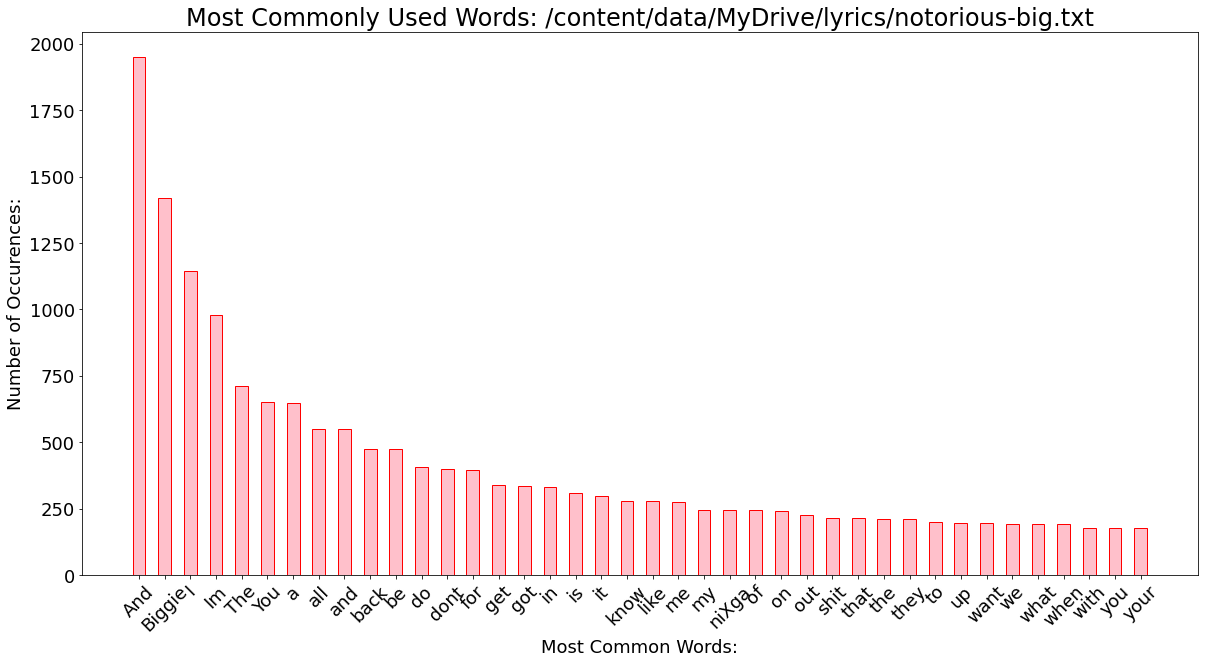

In [ ]:
plotWordFrequency(path)

## Plotting the word frequencies from Lil Wayne poems:

In [ ]:
def plotWordFrequency(input):
    f = open(pth,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'cyan', edgecolor = 'blue',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (pth), fontsize=24)
    plt.show()

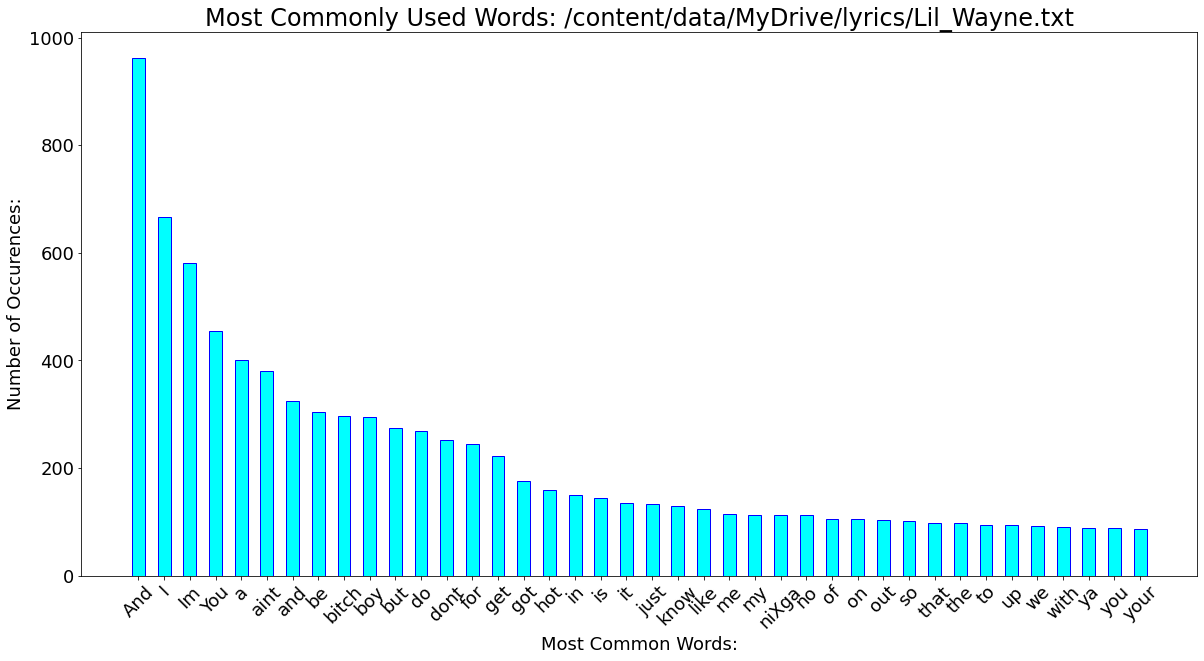

In [ ]:
plotWordFrequency(pth)

## Using Recurrent Neural Network from Keras (Using TensorFlow backend):

In [ ]:
def create_network(depth):
	model = Sequential()
	model.add(LSTM(4, input_shape=(2, 2), return_sequences=True))
	for i in range(depth):
		model.add(LSTM(8, return_sequences=True))
	model.add(LSTM(2, return_sequences=True))
	model.summary()
	model.compile(optimizer='rmsprop',
              loss='mse')
	if artist + ".rap" in os.listdir(".") and train_mode == False:
		model.load_weights(str(artist + ".rap"))
		print("loading saved network: " + str(artist) + ".rap") 
	return model

## Using Markov Chain to generate new lyrics:

In [ ]:
def markov(text_file):
	read = open(text_file, "r", encoding='utf-8').read()
	text_model = markovify.NewlineText(read)
	return text_model

## Determine number of syllables in line:

In [ ]:
def syllables(line):
	count = 0
	for word in line.split(" "):
		vowels = 'aeiouy'
		word = word.lower().strip(".:;?!")
		if word[0] in vowels:
			count +=1
		for index in range(1,len(word)):
			if word[index] in vowels and word[index-1] not in vowels:
				count +=1
		if word.endswith('e'):
			count -= 1
		if word.endswith('le'):
			count+=1
		if count == 0:
			count +=1
	return count / maxsyllables

## Indexing of words rhyme:

In [ ]:
def rhymeindex(lyrics):
	if str(artist) + ".rhymes" in os.listdir(".") and train_mode == False:
		print ("loading saved rhymes from " + str(artist) + ".rhymes")
		return open(str(artist) + ".rhymes", "r",encoding='utf-8').read().split("\n")
	else:
		rhyme_master_list = []
		print ("Building list of rhymes:")
		for i in lyrics:
			word = re.sub(r"\W+", '', i.split(" ")[-1]).lower()
			rhymeslist = pronouncing.rhymes(word)
			rhymeslistends = []      
			for i in rhymeslist:
				rhymeslistends.append(i[-2:])
			try:
				rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
			except Exception:
				rhymescheme = word[-2:]
			rhyme_master_list.append(rhymescheme)
		rhyme_master_list = list(set(rhyme_master_list))
		reverselist = [x[::-1] for x in rhyme_master_list]
		reverselist = sorted(reverselist)
		rhymelist = [x[::-1] for x in reverselist]
		print("List of Sorted 2-Letter Rhyme Ends:")
		print(rhymelist)
		f = open(str(artist) + ".rhymes", "w", encoding='utf-8')
		f.write("\n".join(rhymelist))
		f.close()
		return rhymelist

## Making  rhymes:

In [ ]:
def rhyme(line, rhyme_list):
	word = re.sub(r"\W+", '', line.split(" ")[-1]).lower()
	rhymeslist = pronouncing.rhymes(word)
	rhymeslistends = []
	for i in rhymeslist:
		rhymeslistends.append(i[-2:])
	try:
		rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
	except Exception:
		rhymescheme = word[-2:]
	try:
		float_rhyme = rhyme_list.index(rhymescheme)
		float_rhyme = float_rhyme / float(len(rhyme_list))
		return float_rhyme
	except Exception:
		float_rhyme = None
		return float_rhyme

## Separate each line of the input text:

In [ ]:
def split_lyrics_file(text_file):
	text = open(text_file, encoding='utf-8').read()
	text = text.split("\n")
	while "" in text:
		text.remove("")
	return text

## Generate lyrics:

In [ ]:
def generate_lyrics(text_model, text_file):
	bars = []
	last_words = []
	lyriclength = len(open(text_file,encoding='utf-8').read().split("\n"))
	count = 0
	markov_model = markov(text_file)
	
	while len(bars) < lyriclength / 9 and count < lyriclength * 2:
		bar = markov_model.make_sentence(max_overlap_ratio = .49, tries=100)
		if type(bar) != type(None) and syllables(bar) < 1:
			def get_last_word(bar):
				last_word = bar.split(" ")[-1]
				if last_word[-1] in "!.?,":
					last_word = last_word[:-1]
				return last_word
			last_word = get_last_word(bar)
			if bar not in bars and last_words.count(last_word) < 3:
				bars.append(bar)
				last_words.append(last_word)
				count += 1
	return bars

## Building the dataset:

In [ ]:
def build_dataset(lines, rhyme_list):
	dataset = []
	line_list = []
	for line in lines:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	x_data = []
	y_data = []
	for i in range(len(dataset) - 3):
		line1 = dataset[i    ][1:]
		line2 = dataset[i + 1][1:]
		line3 = dataset[i + 2][1:]
		line4 = dataset[i + 3][1:]
		x = [line1[0], line1[1], line2[0], line2[1]]
		x = np.array(x)
		x = x.reshape(2,2)
		x_data.append(x)
		y = [line3[0], line3[1], line4[0], line4[1]]
		y = np.array(y)
		y = y.reshape(2,2)
		y_data.append(y)
	x_data = np.array(x_data)
	y_data = np.array(y_data)
	return x_data, y_data

## Composing verses:

In [ ]:
def compose_rap(lines, rhyme_list, lyrics_file, model):
	rap_vectors = []
	human_lyrics = split_lyrics_file(lyrics_file)
	initial_index = random.choice(range(len(human_lyrics) - 1))
	initial_lines = human_lyrics[initial_index:initial_index + 2]
	starting_input = []
	for line in initial_lines:
		starting_input.append([syllables(line), rhyme(line, rhyme_list)])
	starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
	rap_vectors.append(starting_vectors)
	for i in range(100):
		rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
	return rap_vectors

## Composing verses ll:

In [ ]:
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
	print ("\n\n")	
	print ("Writing verse:")
	print ("\n\n")
	def last_word_compare(rap, line2):
		penalty = 0 
		for line1 in rap:
			word1 = line1.split(" ")[-1]
			word2 = line2.split(" ")[-1]
			while word1[-1] in "?!,. ":
				word1 = word1[:-1]
			while word2[-1] in "?!,. ":
				word2 = word2[:-1]
			if word1 == word2:
				penalty += 0.2
		return penalty
	def calculate_score(vector_half, syllables, rhyme, penalty):
		desired_syllables = vector_half[0]
		desired_rhyme = vector_half[1]
		desired_syllables = desired_syllables * maxsyllables
		desired_rhyme = desired_rhyme * len(rhyme_list)
		score = 1.0 - abs(float(desired_syllables) - float(syllables)) + abs(float(desired_rhyme) - float(rhyme)) - penalty
		return score
	dataset = []
	for line in generated_lyrics:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	rap = []
	vector_halves = []
	for vector in vectors:
		vector_halves.append(list(vector[0][0])) 
		vector_halves.append(list(vector[0][1]))
	for vector in vector_halves:
		scorelist = []
		for item in dataset:
			line = item[0]
			if len(rap) != 0:
				penalty = last_word_compare(rap, line)
			else:
				penalty = 0
			total_score = calculate_score(vector, item[1], item[2], penalty)
			score_entry = [line, total_score]
			scorelist.append(score_entry)
		fixed_score_list = [0]
		for score in scorelist:
			fixed_score_list.append(float(score[1]))
		max_score = max(fixed_score_list)
		for item in scorelist:
			if item[1] == max_score:
				rap.append(item[0])
				print (str(item[0]))
				for i in dataset:
					if item[0] == i[0]:
						dataset.remove(i)
						break
				break     
	return rap

## Traning function:

In [ ]:
def train(x_data, y_data, model):
	model.fit(np.array(x_data), np.array(y_data),
			  batch_size=2,
			  epochs=5,
			  verbose=1)
	model.save_weights(artist + ".rap")

## Defining main function:

In [ ]:
def main(depth, train_mode):
	model = create_network(depth)
	text_model = markov(text_file)
	if train_mode == True:
		bars = split_lyrics_file(text_file)
	if train_mode == False:
		bars = generate_lyrics(text_model, text_file)
	rhyme_list = rhymeindex(bars)
	if train_mode == True:
		x_data, y_data = build_dataset(bars, rhyme_list)
		train(x_data, y_data, model)
	if train_mode == False:
		vectors = compose_rap(bars, rhyme_list, text_file, model)
		rap = vectors_into_song(vectors, bars, rhyme_list)
		f = open(rap_file, "w", encoding='utf-8')
		for bar in rap:
			f.write(bar)
			f.write("\n")

## Adjusting parameters/hyperparameters:

In [ ]:
depth = 4 
maxsyllables = 8
artist = "artist"
rap_file = "temporary_poem.txt"

## Training phase in order to generating new lyrics in the style of Notorious B.I.G.:

In [ ]:
maxsyllables = 8
text_file = path
train_mode = True        
main(depth, train_mode)
train_mode = False
main(depth, train_mode)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 4)              112       
                                                                 
 lstm_13 (LSTM)              (None, 2, 8)              416       
                                                                 
 lstm_14 (LSTM)              (None, 2, 8)              544       
                                                                 
 lstm_15 (LSTM)              (None, 2, 8)              544       
                                                                 
 lstm_16 (LSTM)              (None, 2, 8)              544       
                                                                 
 lstm_17 (LSTM)              (None, 2, 2)              88        
                                                                 
Total params: 2,248
Trainable params: 2,248
Non-traina

## Generating new lyrics in the style of Lil Wayne:

In [ ]:
maxsyllables = 8
text_file = pth
train_mode = True        
main(depth, train_mode)
train_mode = False
main(depth, train_mode)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 4)              112       
                                                                 
 lstm_1 (LSTM)               (None, 2, 8)              416       
                                                                 
 lstm_2 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_3 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_4 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_5 (LSTM)               (None, 2, 2)              88        
                                                                 
Total params: 2,248
Trainable params: 2,248
Non-trainabl

In [ ]:
print("The above code snippet has run successfully!")

The above code snippet has run successfully!
